My Goal is to understand one of the fundemantals of Machine Learning techniques. 

From my understanding, Auto-regression is based on creating a function f_t(y) with y the variable to be "analysed", in function of time. 

Let's start by importing our dataset

**0. Installing Dependencies**

In [1]:
#Dependencies
%pip install openpyxl matplotlib pandas -q

Note: you may need to restart the kernel to use updated packages.


**1. Retrieving Data**

In [2]:
import pandas as pd
file_path = '../../Data/EnergieUebersichtCH-2024.xlsx' 
xls = pd.ExcelFile(file_path)
#Dataframe in this case in the 3rd sheet Zeitreihen0h15
df = pd.read_excel(xls, sheet_name='Zeitreihen0h15', header=1, nrows=300)
print(df.columns)


Index(['Zeitstempel', 'kWh', 'kWh.1', 'kWh.2', 'kWh.3', 'kWh.4', 'kWh.5',
       'kWh.6', 'kWh.7', 'kWh.8', 'kWh.9', 'kWh.10', 'kWh.11', 'kWh.12',
       'kWh.13', 'kWh.14', 'kWh.15', 'kWh.16', 'kWh.17', 'kWh.18', 'kWh.19',
       'Euro/MWh', 'Euro/MWh.1', 'Euro/MWh.2', 'Euro/MWh.3', 'kWh.20',
       'kWh.21', 'kWh.22', 'kWh.23', 'kWh.24', 'kWh.25', 'kWh.26', 'kWh.27',
       'kWh.28', 'kWh.29', 'kWh.30', 'kWh.31', 'kWh.32', 'kWh.33', 'kWh.34',
       'kWh.35', 'kWh.36', 'kWh.37', 'kWh.38', 'kWh.39', 'kWh.40', 'kWh.41',
       'kWh.42', 'kWh.43', 'kWh.44', 'kWh.45', 'kWh.46', 'kWh.47', 'kWh.48',
       'kWh.49', 'kWh.50', 'kWh.51', 'kWh.52', 'kWh.53', 'kWh.54', 'kWh.55',
       'kWh.56', 'kWh.57', 'kWh.58', 'kWh.59'],
      dtype='object')


**2. Data variables / potential parameters** 

**Pre-processing step** Renaming column names to be clear

In [3]:
column_mapping = {
    'kWh': 'Total Energy Consumed by End Users (kWh)',
    'kWh.1': 'Total Energy Production (kWh)',
    'kWh.2': 'Total Energy Consumption (kWh)',
    'kWh.3': 'Net Outflow (kWh)',
    'kWh.4': 'Grid Feed-In (kWh)',
    'kWh.5': 'Positive Secondary Control Energy (kWh)',
    'kWh.6': 'Negative Secondary Control Energy (kWh)',
    'kWh.7': 'Positive Tertiary Control Energy (kWh)',
    'kWh.8': 'Negative Tertiary Control Energy (kWh)'
}

df.rename(columns=column_mapping, inplace=True)


The goal is to predict the next element of the Total Energy Consumption columb:

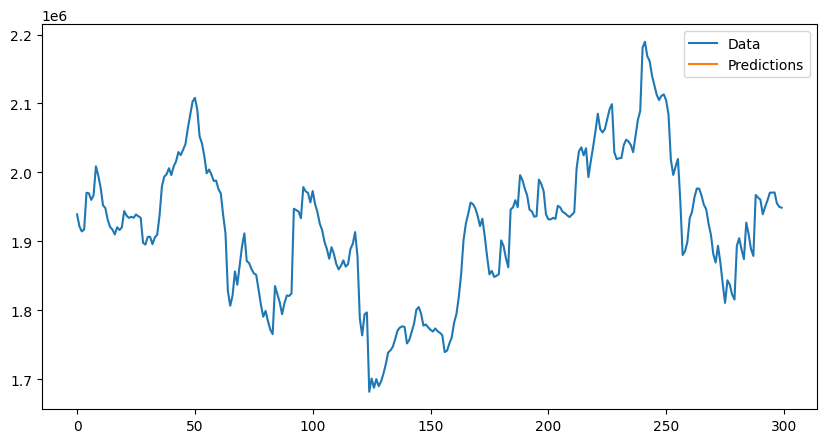

In [4]:
energy_consumption_data = df['Total Energy Consumption (kWh)'].dropna().values 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(energy_consumption_data, label='Data')
plt.plot(range(len(energy_consumption_data), len(energy_consumption_data)), label='Predictions')
plt.legend()
plt.show()


Now that we have the data correct set up, let's create two tables: weights, prev_values and the bias

In [5]:
weights = [0 for i in range(100)]
prev_values = [0 for i in range(100)]
y = 100
bias = 0
energy_consumption_data = df['Total Energy Consumption (kWh)'].dropna().values
f_y = df['Total Energy Consumption (kWh)'][y]
print(f_y)


1973067.723669


We have multiple values to affix here, we need to find the weights to approximate our current consumed energy at time t (f(y)). We can use Linear regression to try to find the weights and the bias?

In [6]:
# Define Parameters
p = 10  # lags
alpha = 0.01  # Learning rate
iterations = 1000 

In [14]:
import numpy as np

X, y = [], []
for i in range(p, len(energy_consumption_data)):
    X.append(energy_consumption_data[i-p:i])
    y.append(energy_consumption_data[i])
X, y = np.array(X), np.array(y)

In [15]:
weights = np.random.randn(p)
bias = 0

In [16]:
# Training using Gradient Descent
for _ in range(iterations):
    y_pred = np.dot(X, weights) + bias
    error = y - y_pred
    
    weights += alpha * np.dot(error, X) / len(y)
    bias += alpha * np.mean(error)

/var/folders/t4/tvh60p3s6t1g30sq60618qpw0000gn/T/ipykernel_33065/1657647782.py:6: RuntimeWarning: invalid value encountered in add
  weights += alpha * np.dot(error, X) / len(y)
/var/folders/t4/tvh60p3s6t1g30sq60618qpw0000gn/T/ipykernel_33065/1657647782.py:7: RuntimeWarning: invalid value encountered in scalar add
  bias += alpha * np.mean(error)


In [17]:
# Make Predictions
future_steps = 50
predictions = []
input_seq = energy_consumption_data[-p:].tolist()

In [18]:
for _ in range(future_steps):
    pred_value = np.dot(input_seq, weights) + bias
    #chaque pred_value a son propre bias, donc vecteur?
    predictions.append(pred_value)
    input_seq.pop(0)
    input_seq.append(pred_value)


Visualisation des résultats

In [12]:
print(predictions)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


Ayayyyy